# WebScrapping de Données

* Trouver une banque de données ouverte sur le sujet de votre choix (énergie,éducation, santé, environnement, etc.) ;

* Scraper les données et effectuer un nettoyage ;

* Produire 3 à 5 visualisations pertinentes avec l’outil de visualisation de votre choix ;

* Rédiger une page présentant les insights tirés de vos visualisations ainsi que vos recommandations.

# I- Scrapping des données du site books.toscrape

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

base_url = "http://books.toscrape.com/"
url = base_url + "catalogue/page-1.html"

all_books = []

while True:
    print("Scraping :", url)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")

    articles = soup.select(".product_pod")

    for art in articles:
        title = art.h3.a["title"]
        #Encodage pour remplacer le symbole de la devise
        price = art.select_one(".price_color").text.replace("Â", "").replace("£", "")
        availability = art.select_one(".instock.availability").text.strip()

        #Conversion du type objet en nombre
        rating_str = art.select_one(".star-rating")["class"][1]
        rating_map = {"One":1, "Two":2, "Three":3, "Four":4, "Five":5}
        rating = rating_map[rating_str]

        #Récupérer les catégories dans le catalogue
        link = art.h3.a["href"]
        book_url = base_url + "catalogue/" + link.replace("../", "")
        r2 = requests.get(book_url)
        soup2 = BeautifulSoup(r2.text, "html.parser")
        category = soup2.select("ul.breadcrumb li")[2].text.strip()

        all_books.append({
            "title": title,
            "price": float(price),
            "availability": availability,
            "rating": rating,
            "category": category,
            "url": book_url
        })

    #Scraping de la page qui suit
    next_btn = soup.select_one(".next a")
    if next_btn:
        next_page = next_btn["href"]
        url = base_url + "catalogue/" + next_page
        time.sleep(1)
    else:
        break

#Enregistrement du fichier CSV
df = pd.DataFrame(all_books)
df.to_csv("books.csv", index=False)

Scraping : http://books.toscrape.com/catalogue/page-1.html
Scraping : http://books.toscrape.com/catalogue/page-2.html
Scraping : http://books.toscrape.com/catalogue/page-3.html
Scraping : http://books.toscrape.com/catalogue/page-4.html
Scraping : http://books.toscrape.com/catalogue/page-5.html
Scraping : http://books.toscrape.com/catalogue/page-6.html
Scraping : http://books.toscrape.com/catalogue/page-7.html
Scraping : http://books.toscrape.com/catalogue/page-8.html
Scraping : http://books.toscrape.com/catalogue/page-9.html
Scraping : http://books.toscrape.com/catalogue/page-10.html
Scraping : http://books.toscrape.com/catalogue/page-11.html
Scraping : http://books.toscrape.com/catalogue/page-12.html
Scraping : http://books.toscrape.com/catalogue/page-13.html
Scraping : http://books.toscrape.com/catalogue/page-14.html
Scraping : http://books.toscrape.com/catalogue/page-15.html
Scraping : http://books.toscrape.com/catalogue/page-16.html
Scraping : http://books.toscrape.com/catalogue/pa

# II- Nettoyage de la base

In [ ]:
#Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("books.csv")
df.head()


,title,price,availability,rating,category,url
0,A Light in the Attic,51.77,In stock,3,Poetry,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,53.74,In stock,1,Historical Fiction,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,50.10,In stock,1,Fiction,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,47.82,In stock,4,Mystery,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,54.23,In stock,5,History,http://books.toscrape.com/catalogue/sapiens-a-...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1000 non-null   object 
 1   price         1000 non-null   float64
 2   availability  1000 non-null   object 
 3   rating        1000 non-null   int64  
 4   category      1000 non-null   object 
 5   url           1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [ ]:
#Valeurs manquantes
df.isnull().sum()

,0
title,0
price,0
availability,0
rating,0
category,0
url,0


In [ ]:
#Valeurs dupliquées
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,price,rating
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


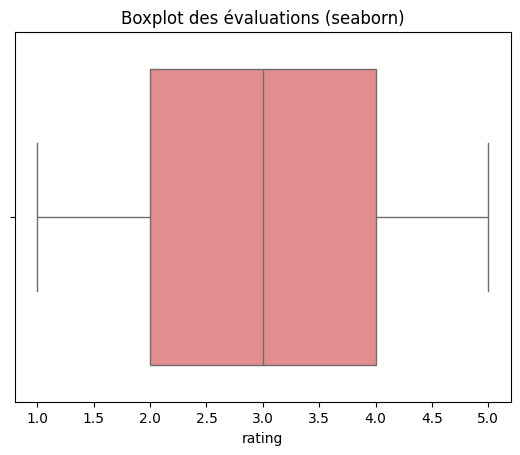

In [ ]:
sns.boxplot(x=df['rating'], color='lightcoral')
plt.title('Boxplot des évaluations (seaborn)')
plt.show()

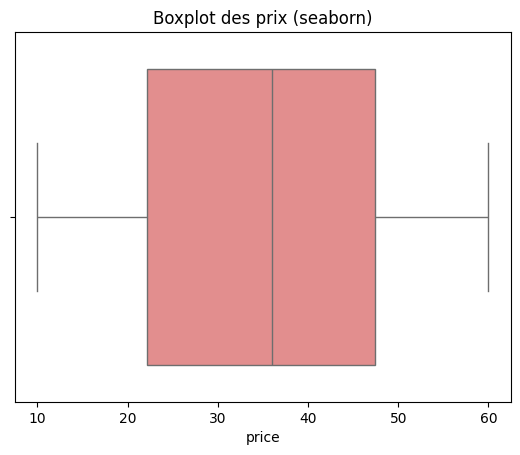

In [ ]:
sns.boxplot(x=df['price'], color='lightcoral')
plt.title('Boxplot des prix (seaborn)')
plt.show()

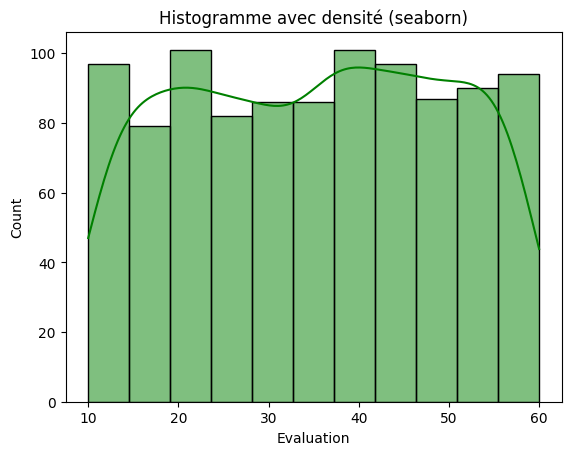

In [ ]:
sns.histplot(df['price'], kde=True, color='green')
plt.title('Histogramme avec densité (seaborn)')
plt.xlabel('Evaluation')
plt.show()

# III- Visualisation des données

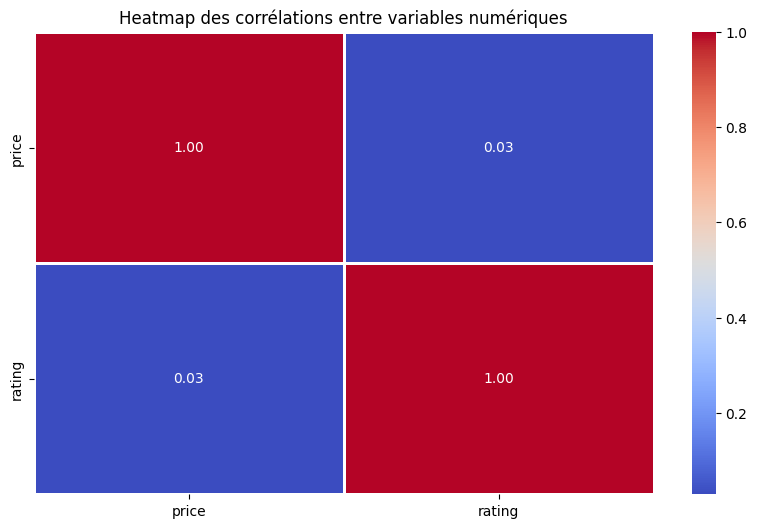

In [ ]:
# Sélection des colonnes numériques
numeric_df = df.select_dtypes(include='number')

# Calcul de la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.995)
plt.title("Heatmap des corrélations entre variables numériques")
plt.show()

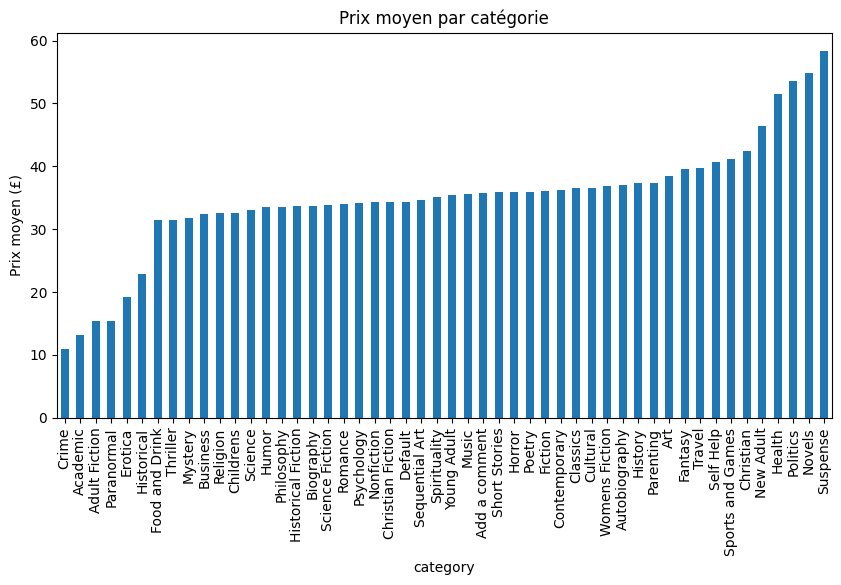

In [ ]:
#Prix moyen par catégorie
df.groupby("category")["price"].mean().sort_values().plot(kind="bar", figsize=(10,5))
plt.title("Prix moyen par catégorie")
plt.ylabel("Prix moyen (£)")
plt.show()


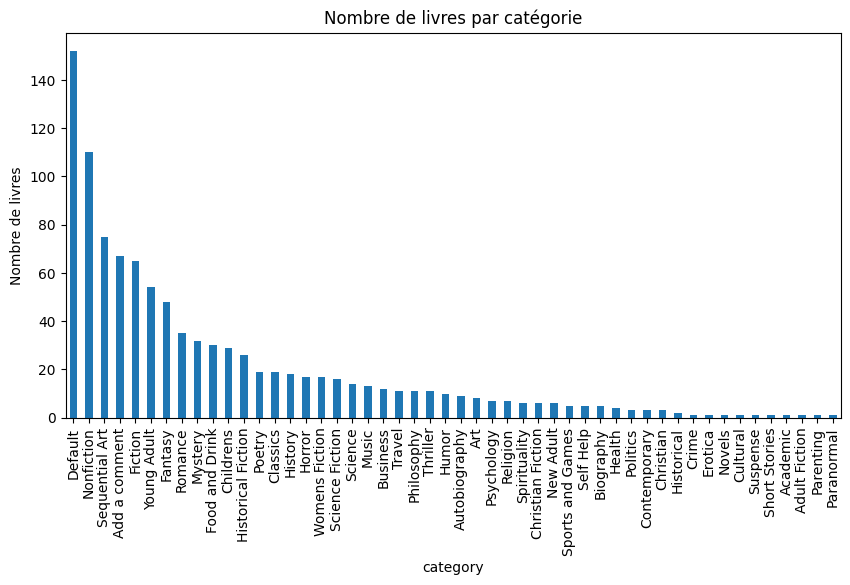

In [ ]:
#Nombre de livres par catégorie
df["category"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Nombre de livres par catégorie")
plt.ylabel("Nombre de livres")
plt.show()


#IV - Présentation d'insights et recommandations


## **1. Introduction**

L’objectif de ce projet était de collecter, analyser et visualiser les données issues du site *BooksToScrape*, un site spécialement conçu pour l’apprentissage du web scraping.
Après extraction et nettoyage des données (prix, note, disponibilité, catégorie), trois visualisations principales ont été produites afin d’obtenir des insights pertinents sur la distribution des livres selon leurs prix et leurs catégories.


## **2. Insights tirés des visualisations**

### **2.1 Heatmap – Relations entre variables**

La heatmap a mis en évidence les relations entre trois variables principales :

* **prix**
* **note (rating)**
* **catégorie**

**Principaux enseignements :**

* La corrélation entre rating et prix est faible, ce qui indique que les livres bien notés ne sont pas forcément plus chers.
* Les variations de prix semblent davantage dépendre de la catégorie que de la note.
* Certaines catégories présentent une concentration élevée de livres dans les gammes de prix les plus élevées.

Conclusion : le prix d’un livre est davantage déterminé par son genre que par sa qualité perçue.



### **2.2 Prix moyen par catégorie**

Cette visualisation montre que certaines catégories se démarquent avec des prix significativement plus élevés.

**Observations principales :**

* Les catégories comme **Suspens**, **Novels**, ou **Politics** présentent les prix moyens les plus élevés.
* D’autres catégories comme **Crime**, **Academic** ou **Adult Fiction** affichent des prix moyens nettement plus bas.
* L’écart entre certaines catégories peut aller du simple au triple.

Conclusion : le catalogue semble segmenté par gamme tarifaire, avec des catégories où le prix est systématiquement plus élevé.


### **2.3 Nombre de livres par catégorie**

Cette visualisation montre la répartition du nombre d’ouvrages disponibles pour chaque catégorie.

**Constats principaux :**

* Certaines catégories sont très représentées, ce qui indique un large éventail.
* D’autres catégories sont très sous-représentées, ce qui montre une niche éditoriale.
* La distribution est très inégale avec certaines catégories qui dominent le catalogue.

Conclusion : le site propose un catalogue très déséquilibré, concentré sur quelques catégories populaires tandis que d’autres sont marginales.


# **3. Conclusion générale**

L’analyse combinée de ces trois visualisations montre que :

1. Le prix est surtout lié à la catégorie, pas à la note.
2. Il existe une segmentation claire : certaines catégories sont systématiquement plus chères.
3. L’offre du catalogue est très inégale : certaines catégories regroupent une grande partie du stock, d’autres sont presque inexistantes.

Ces constats révèlent une stratégie éditoriale où les catégories populaires attirent un volume important, tandis que les catégories pointues se distinguent par des prix plus élevés.


# **4. Recommandations**

Nous proposons que les propriétaires du site élargissent l’offre dans les catégories à forte valeur ou encore ajuste les prix des livres de catégories populaires.

Les catégories premium qui présentent un prix moyen élevé pourraient être enrichies pour augmenter la valeur du panier moyen.



